In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = "log.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df = df[df['Result'] == 'SUCCESS']
df = df[df['Cities'] == 2]

# Display the first few rows of the DataFrame to confirm the data has been loaded correctly
df.head()

,Encoding,Height,Width,Cities,Trains,Result,Success,Failures,Detailed Failures,Solving Proportion,Given Horizon,Resulting Horizon
0,encodings/multiple/grid/,50,50,2,5,SUCCESS,293,7,UNSATISFIABLE:UNSATISFIABLE:UNSATISFIABLE:UNSA...,0.005041,72,49
1,encodings/multiple/grid/,50,50,2,10,SUCCESS,80,3,UNSATISFIABLE:UNSATISFIABLE:UNSATISFIABLE,0.005869,69,51
2,encodings/multiple/grid/,50,50,5,5,SUCCESS,66,1,UNSATISFIABLE,0.016938,158,121
3,encodings/multiple/grid/,50,50,5,10,SUCCESS,16,1,UNSATISFIABLE,0.040396,168,140
4,encodings/multiple/grid/,50,50,1000,5,SUCCESS,7,0,NaN,0.012608,219,182


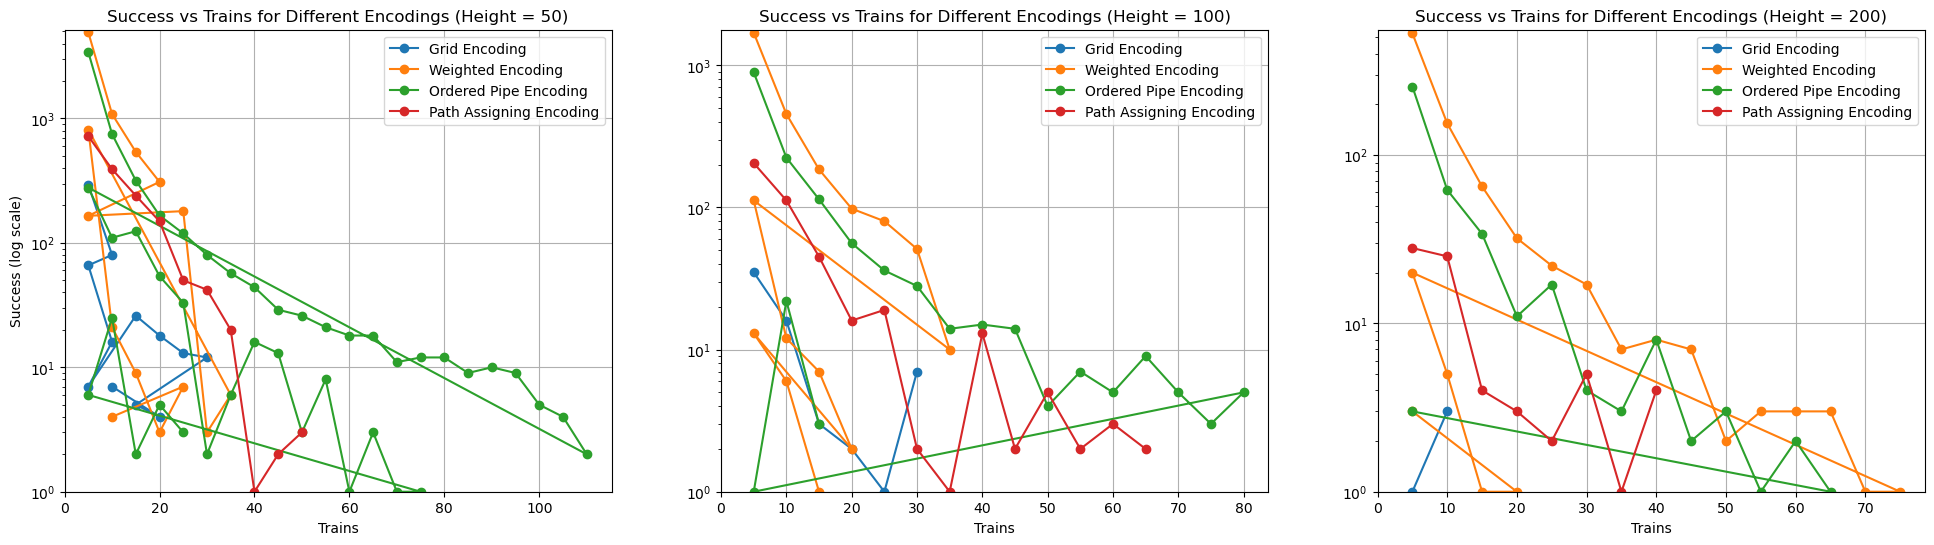

In [16]:
import matplotlib.pyplot as plt

# Filter rows for each encoding and height = 50
grid_df_50 = df[(df['Encoding'] == 'encodings/multiple/grid/') & (df['Height'] == 50)]
weighted_df_50 = df[(df['Encoding'] == 'encodings/multiple/weighted/') & (df['Height'] == 50)]
ordered_pipe_df_50 = df[(df['Encoding'] == 'encodings/multiple/ordered_pipe/') & (df['Height'] == 50)]
path_assigning_df_50 = df[(df['Encoding'] == 'encodings/multiple/path_assigning/') & (df['Height'] == 50)]

# Filter rows for each encoding and height = 100
grid_df_100 = df[(df['Encoding'] == 'encodings/multiple/grid/') & (df['Height'] == 100)]
weighted_df_100 = df[(df['Encoding'] == 'encodings/multiple/weighted/') & (df['Height'] == 100)]
ordered_pipe_df_100 = df[(df['Encoding'] == 'encodings/multiple/ordered_pipe/') & (df['Height'] == 100)]
path_assigning_df_100 = df[(df['Encoding'] == 'encodings/multiple/path_assigning/') & (df['Height'] == 100)]

# Filter rows for each encoding and height = 200
grid_df_200 = df[(df['Encoding'] == 'encodings/multiple/grid/') & (df['Height'] == 200)]
weighted_df_200 = df[(df['Encoding'] == 'encodings/multiple/weighted/') & (df['Height'] == 200)]
ordered_pipe_df_200 = df[(df['Encoding'] == 'encodings/multiple/ordered_pipe/') & (df['Height'] == 200)]
path_assigning_df_200 = df[(df['Encoding'] == 'encodings/multiple/path_assigning/') & (df['Height'] == 200)]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot for height = 50 on the left subplot
axs[0].plot(grid_df_50['Trains'], grid_df_50['Success'], marker='o', label='Grid Encoding')
axs[0].plot(weighted_df_50['Trains'], weighted_df_50['Success'], marker='o', label='Weighted Encoding')
axs[0].plot(ordered_pipe_df_50['Trains'], ordered_pipe_df_50['Success'], marker='o', label='Ordered Pipe Encoding')
axs[0].plot(path_assigning_df_50['Trains'], path_assigning_df_50['Success'], marker='o', label='Path Assigning Encoding')
axs[0].set_xlim(left=0)
axs[0].set_ylim(bottom=1)
axs[0].set_yscale('log')
axs[0].set_xlabel('Trains')
axs[0].set_ylabel('Success (log scale)')
axs[0].set_title('Success vs Trains for Different Encodings (Height = 50)')
axs[0].legend()
axs[0].grid(True)

# Plot for height = 100 in the middle subplot
axs[1].plot(grid_df_100['Trains'], grid_df_100['Success'], marker='o', label='Grid Encoding')
axs[1].plot(weighted_df_100['Trains'], weighted_df_100['Success'], marker='o', label='Weighted Encoding')
axs[1].plot(ordered_pipe_df_100['Trains'], ordered_pipe_df_100['Success'], marker='o', label='Ordered Pipe Encoding')
axs[1].plot(path_assigning_df_100['Trains'], path_assigning_df_100['Success'], marker='o', label='Path Assigning Encoding')
axs[1].set_xlim(left=0)
axs[1].set_ylim(bottom=1)
axs[1].set_yscale('log')
axs[1].set_xlabel('Trains')
axs[1].set_title('Success vs Trains for Different Encodings (Height = 100)')
axs[1].legend()
axs[1].grid(True)

# Plot for height = 200 on the right subplot
axs[2].plot(grid_df_200['Trains'], grid_df_200['Success'], marker='o', label='Grid Encoding')
axs[2].plot(weighted_df_200['Trains'], weighted_df_200['Success'], marker='o', label='Weighted Encoding')
axs[2].plot(ordered_pipe_df_200['Trains'], ordered_pipe_df_200['Success'], marker='o', label='Ordered Pipe Encoding')
axs[2].plot(path_assigning_df_200['Trains'], path_assigning_df_200['Success'], marker='o', label='Path Assigning Encoding')
axs[2].set_xlim(left=0)
axs[2].set_ylim(bottom=1)
axs[2].set_yscale('log')
axs[2].set_xlabel('Trains')
axs[2].set_title('Success vs Trains for Different Encodings (Height = 200)')
axs[2].legend()
axs[2].grid(True)

# Show the plots
plt.show()

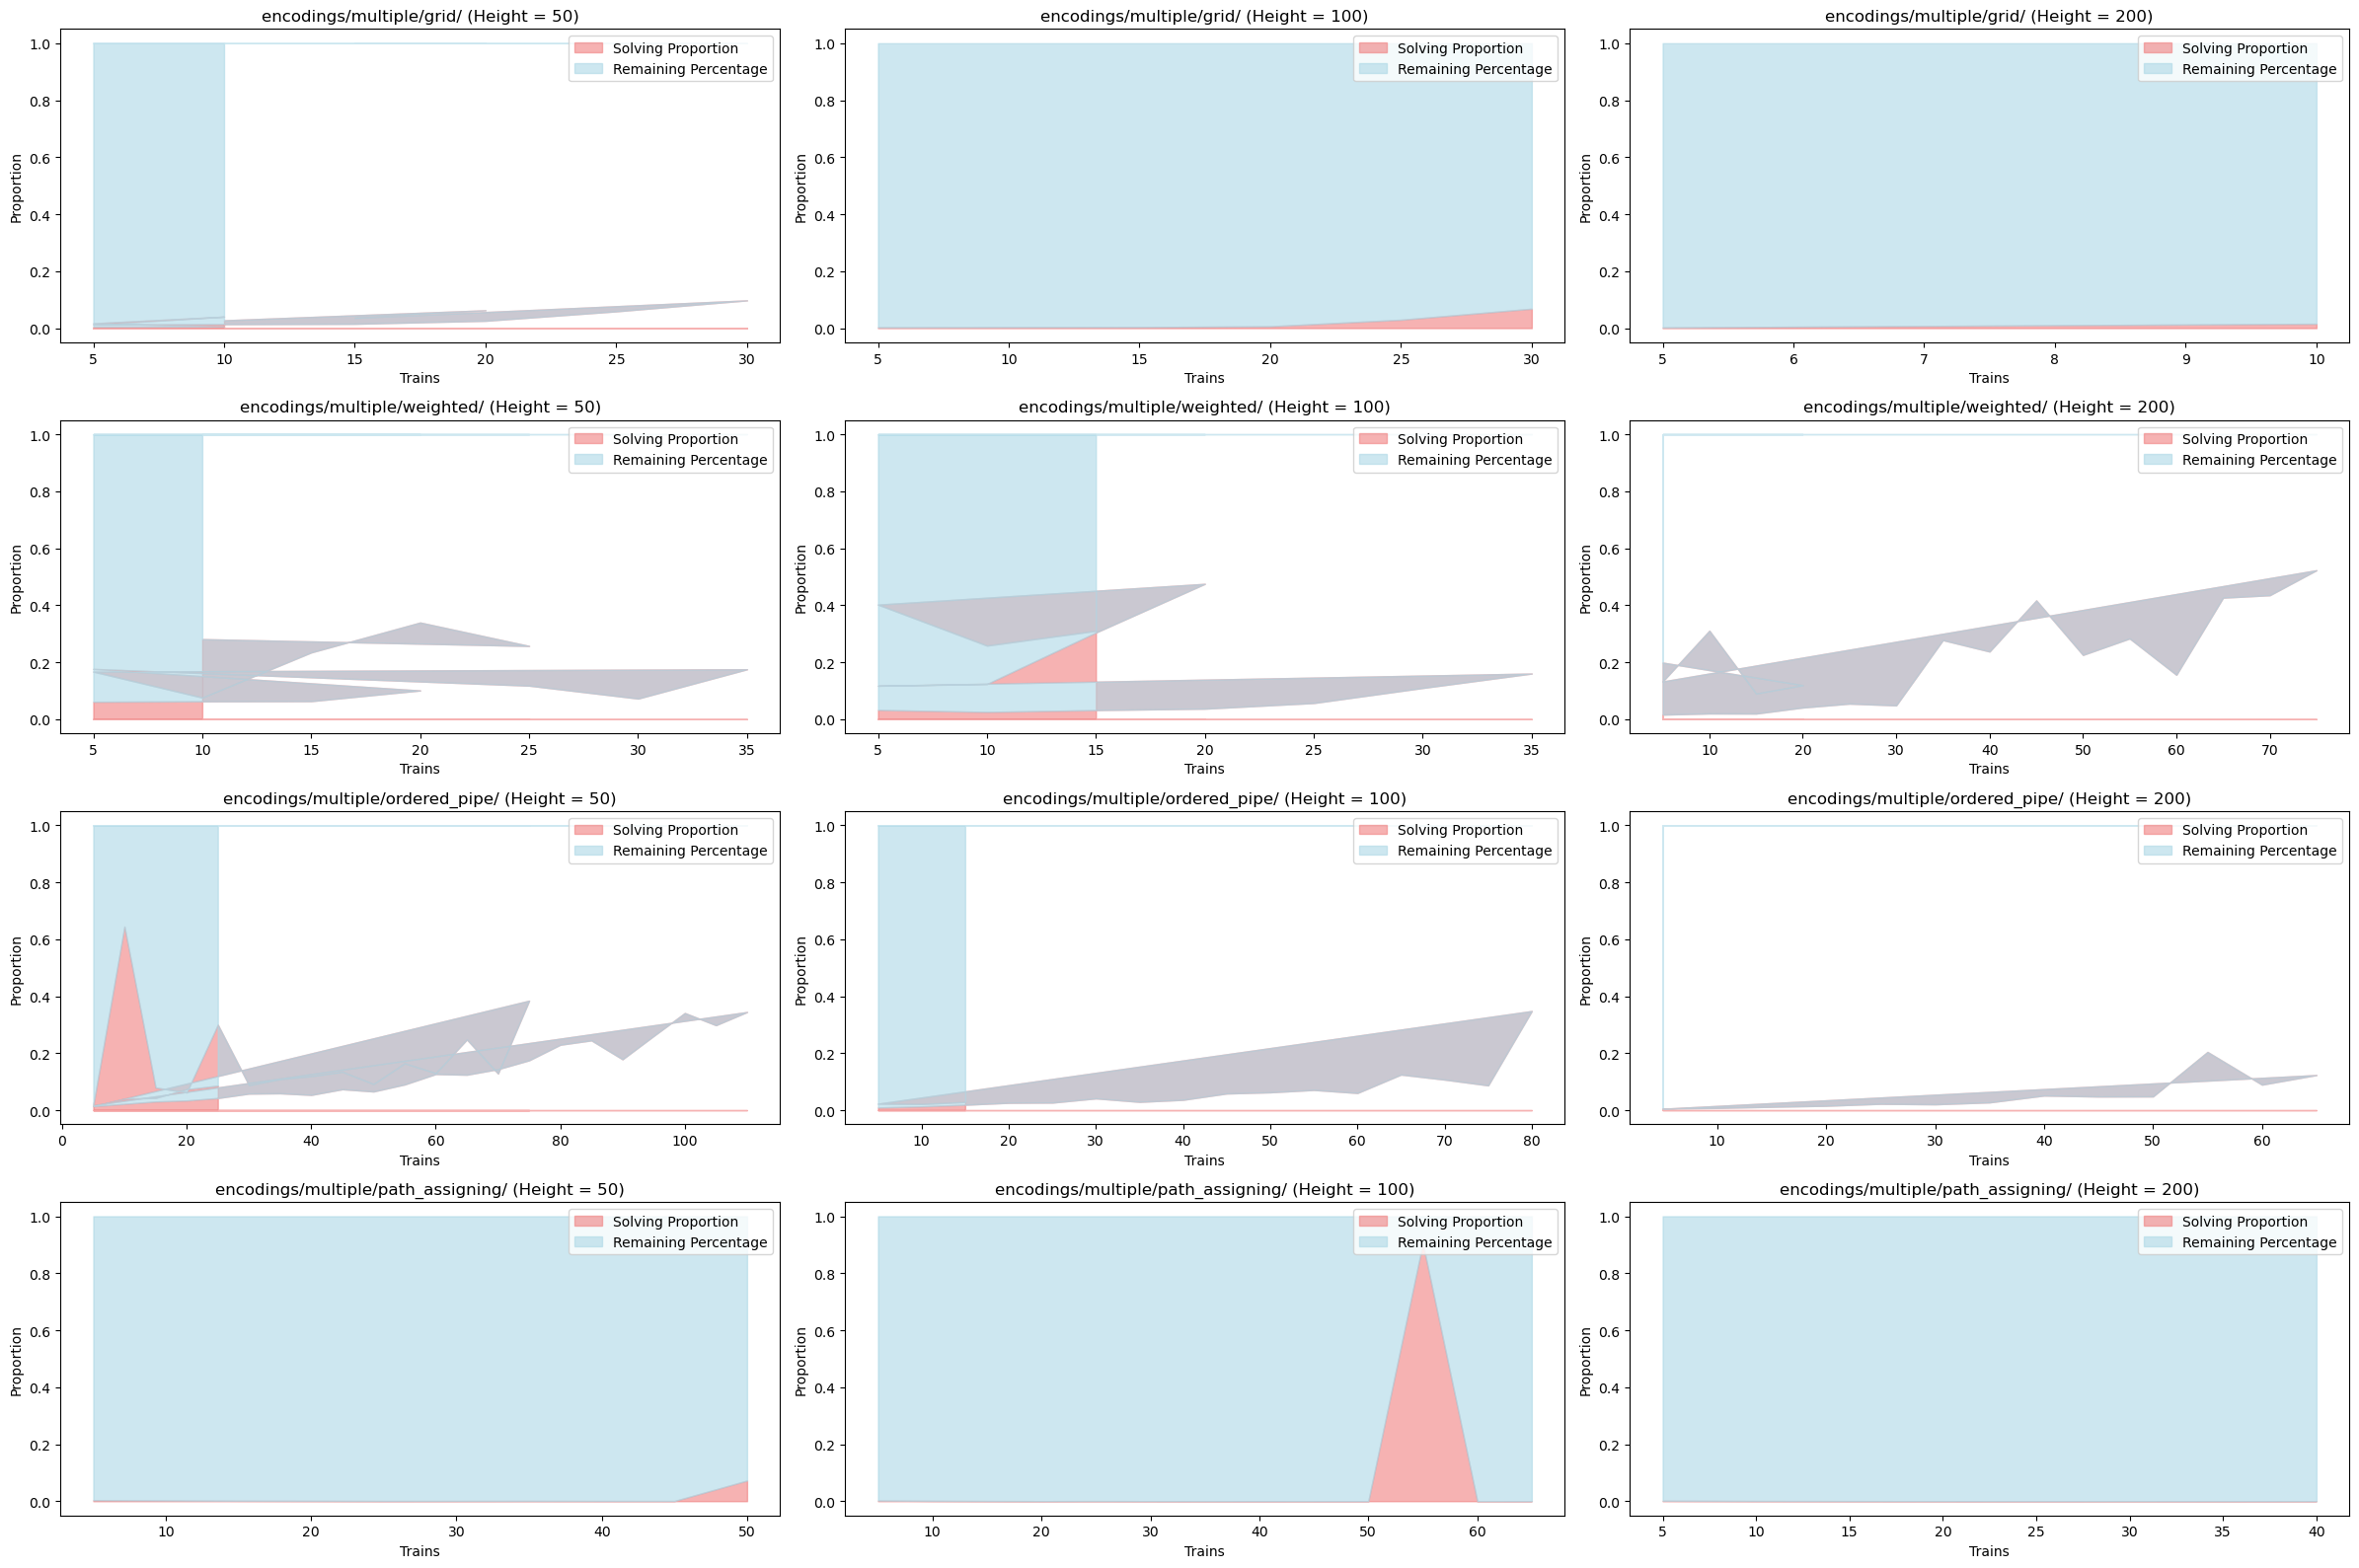

In [17]:
# Create a list of encodings and heights to iterate through
encodings = ["encodings/multiple/grid/", "encodings/multiple/weighted/", "encodings/multiple/ordered_pipe/", "encodings/multiple/path_assigning/"]
heights = [50, 100, 200]

# Create a figure with four rows and three columns (4 encodings x 3 heights)
fig, axs = plt.subplots(len(encodings), len(heights), figsize=(24, 16))

# Iterate through each encoding and height
for i, encoding in enumerate(encodings):
    for j, height in enumerate(heights):
        # Filter the DataFrame for the current encoding and height
        df_filtered = df[(df["Encoding"] == encoding) & (df['Height'] == height)]
        
        # Extract the "Trains" and "Solving Proportion" columns
        trains = df_filtered["Trains"]
        solving_proportion = df_filtered["Solving Proportion"]
        remaining_percentage = 1 - solving_proportion
        
        # Plot the solving proportion and remaining percentage
        axs[i, j].fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')
        axs[i, j].fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
        axs[i, j].set_xlabel('Trains')
        axs[i, j].set_ylabel('Proportion')
        axs[i, j].set_title(f'{encoding} (Height = {height})')
        axs[i, j].legend()
        
# Adjust layout and show the plots
plt.tight_layout()
plt.show()